In [ ]:
%matplotlib inline

import numpy as np
import imageio
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
im = imageio.imread("./imagenes/s3/3.pgm")
# Conviete una imagen en matriz
im = im.astype(np.uint8)

print(im)


[[101 106 102 ... 108 107 108]
 [101 104 102 ... 106 108 105]
 [ 99 104 102 ... 108 106 111]
 ...
 [ 64  69  75 ...  42  48  48]
 [ 74  81  85 ...  46  48  44]
 [ 77  83  84 ...  46  50  45]]


/tmp/ipykernel_70206/813376346.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread("./imagenes/s3/3.pgm")


In [5]:
print('Max original', end = ' ')
print(np.amax(im))
print('Min original', end = ' ')
print(np.amin(im))

Max original 204
Min original 10


In [ ]:
# Convertimos la imagen a un formato de punto flotante
# para evitar problemas de overflow y para poder normalizarla  y poder visualizarla correctamente
im_original = im

im = im / 255

print('Max original', end = ' ')
print(np.amax(im))
print('Min original', end = ' ')
print(np.amin(im))

Max original 0.8
Min original 0.0392156862745098


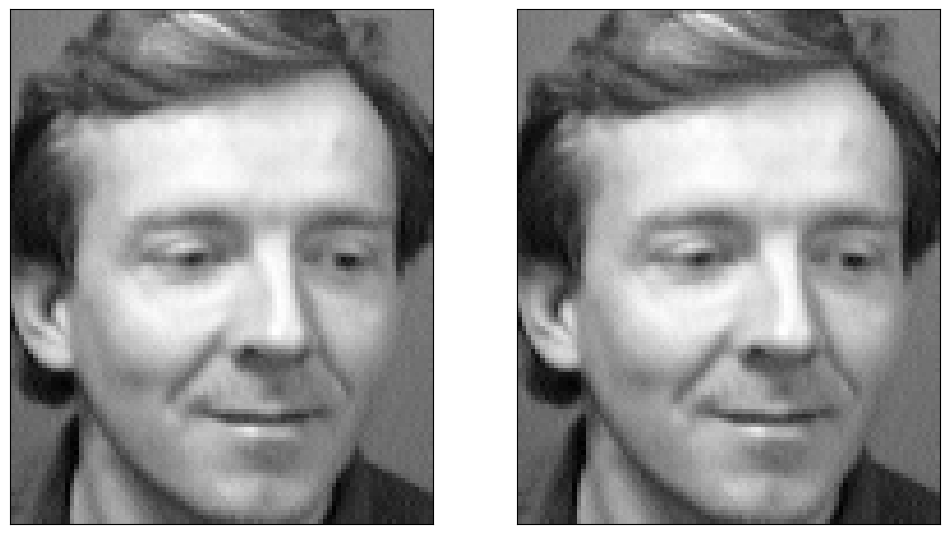

In [9]:
# graficamos las dos imágenes
fix, ax = plt.subplots(1, 2, figsize=(12,12),
                        subplot_kw = {'xticks' : [], 'yticks':[]})

ax[0].imshow(im_original, cmap = "gray")
ax[1].imshow(im, cmap = "gray")


In [ ]:
#
im = im.astype(np.uint8)
print(np.amax(im))
print(np.amin(im))

208
2


/tmp/ipykernel_70206/3845374113.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(path)


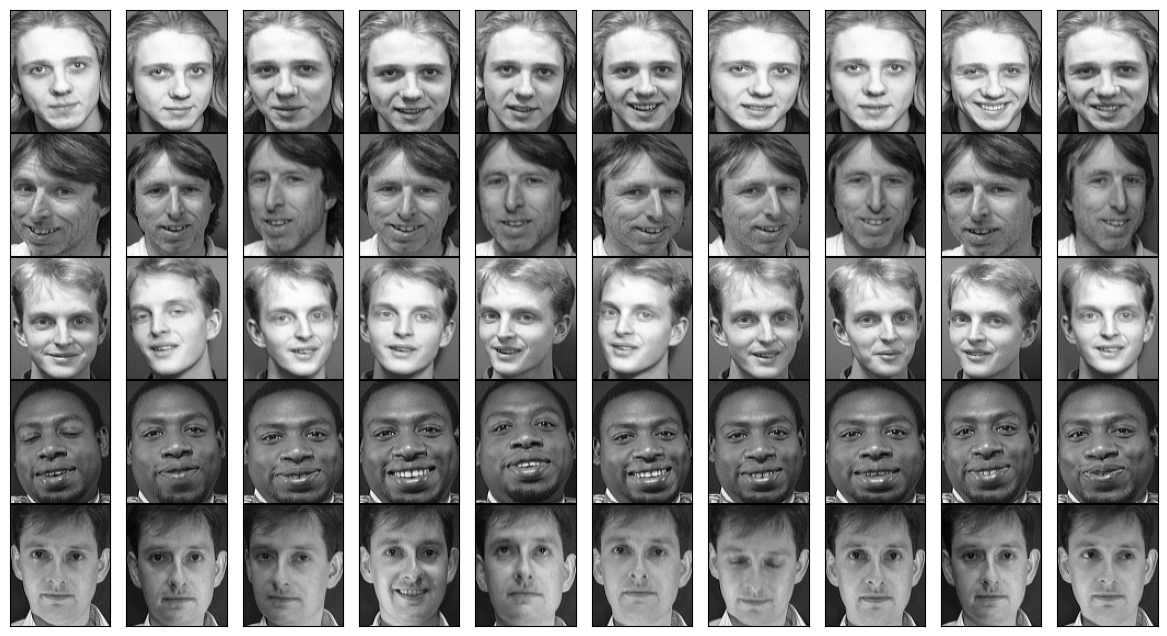

In [ ]:
#graficamos la imagen convertida a uint8
from glob import iglob

caras_lista = []

for path in iglob('./imagenes/**/*.pgm', recursive=True):#leeemos todas las imágenes
    im = imageio.imread(path)
    cara = pd.Series(im.flatten(), name=path)
    caras_lista.append(cara)

caras = pd.DataFrame(caras_lista)

fig, axes = plt.subplots(5, 10, figsize=(15,8),
                        subplot_kw = {'xticks' : [], 'yticks':[]},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras.iloc[i].values.reshape(112,92), cmap = "gray")

/tmp/ipykernel_70206/3845374113.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(path)


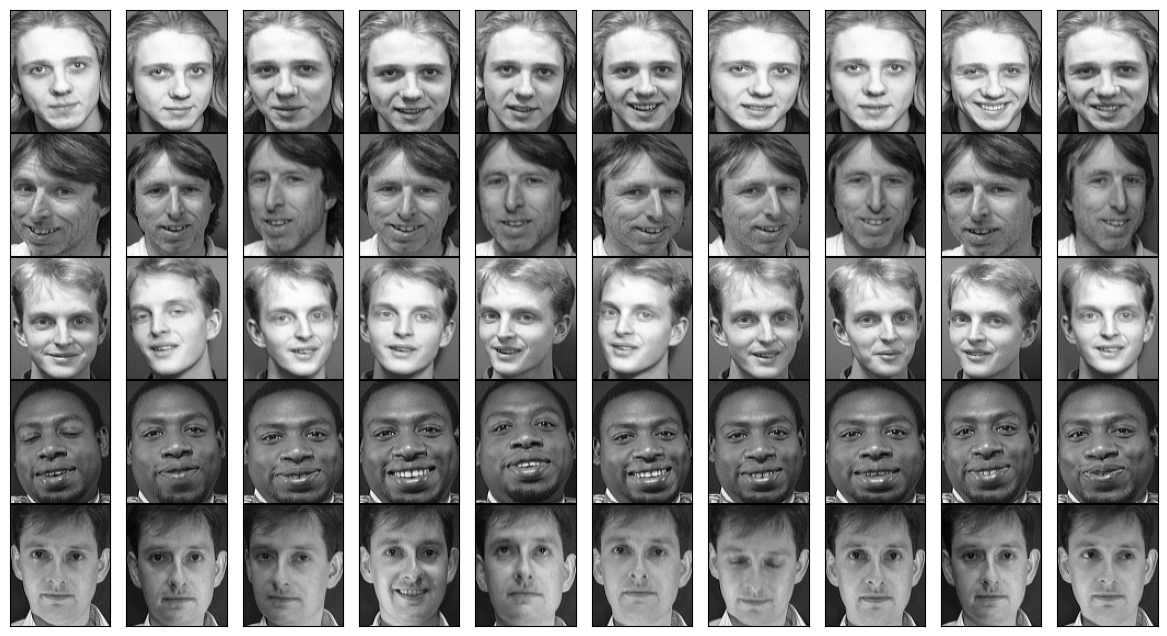

In [27]:
from glob import iglob

caras_lista = []

for path in iglob('./imagenes/**/*.pgm', recursive=True):
    im = imageio.imread(path)
    cara = pd.Series(im.flatten(), name=path)
    caras_lista.append(cara)

caras = pd.DataFrame(caras_lista)

fig, axes = plt.subplots(5, 10, figsize=(15,8),
                        subplot_kw = {'xticks' : [], 'yticks':[]},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras.iloc[i].values.reshape(112,92), cmap = "gray")

In [36]:
from sklearn.decomposition import PCA #importamos PCA

In [37]:
# 
caras_pca = PCA(n_components = 0.999)#nos quedamos con el 99.9% de la varianza

caras_pca.fit(caras)

PCA(n_components=0.999)

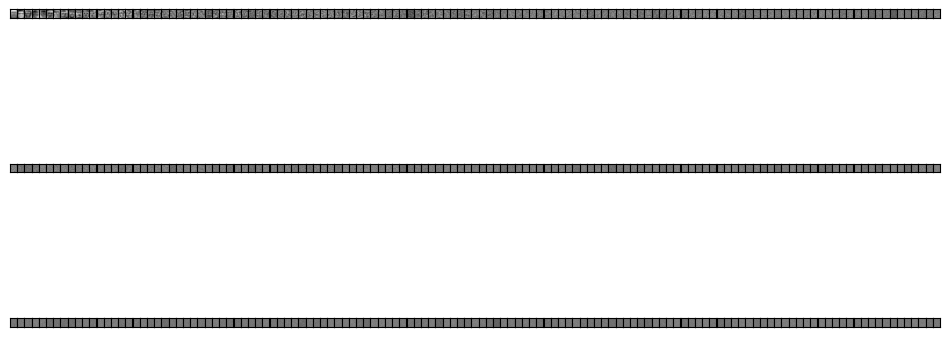

In [38]:
#grficamos 3 filas y tantas columnas como componentes principales
filas = 3
columnas = caras_pca.n_components_ // filas

fig, axes = plt.subplots(filas, columnas, figsize=(12, 6),
                       subplot_kw = {'xticks' : [], 'yticks':[]},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras_pca.components_[i].reshape(112,92), cmap = "gray")

In [32]:
print(caras_pca.n_components_)

388


In [33]:
componentes = caras_pca.transform(caras)
proyeccion = caras_pca.inverse_transform(componentes)

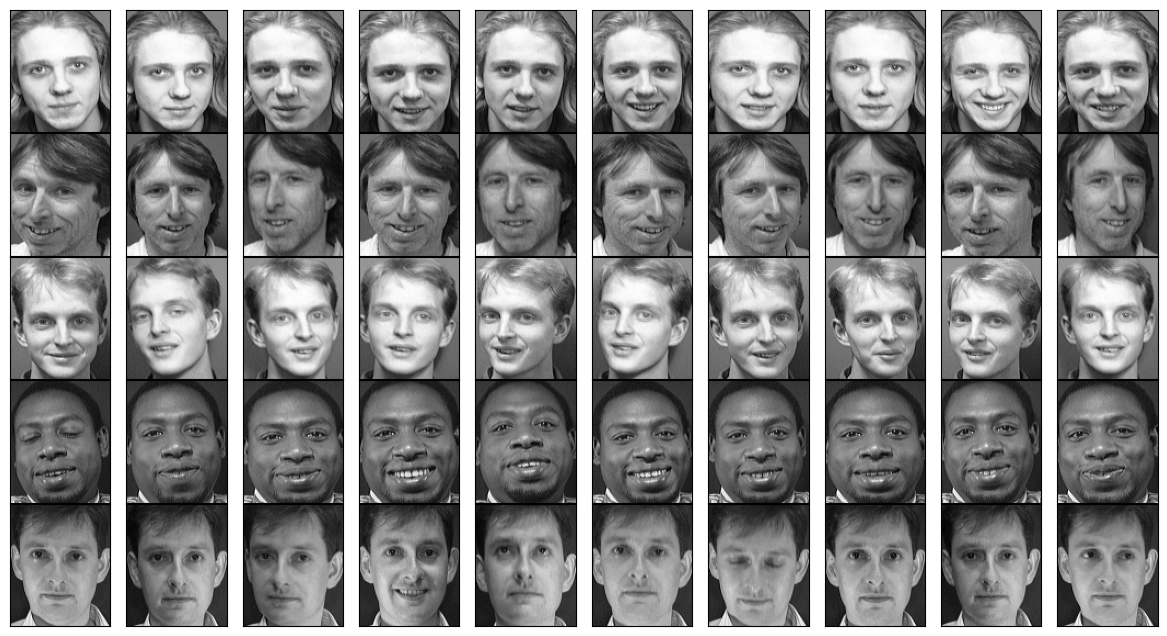

In [35]:
fig, axes = plt.subplots(5, 10, figsize=(15, 8),
                        subplot_kw = {'xticks' : [], 'yticks':[]},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(proyeccion[i].reshape(112,92), cmap = "gray")